<a href="https://colab.research.google.com/github/cero1979/Repositorio/blob/main/CalculoIntegral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def f(x):
    # Define tu función aquí
    return x**2  # Función de ejemplo x^2

def suma_extremo_derecho(f, a, b, n):
    """
    Calcula la suma de las áreas de los rectángulos aproximados
    usando los extremos derechos.
    """
    ancho = (b - a) / n
    area_total = 0
    for i in range(1, n+1):
        xi = a + i * ancho
        area_total += f(xi) * ancho
    return area_total

# Valores dados en el problema
valores_de_n = [10, 30, 50, 100]

# Límites de integración
a = 0
b = 1

print("Aproximaciones usando Extremos Derechos:")
for n in valores_de_n:
    area = suma_extremo_derecho(f, a, b, n)
    print(f"n = {n}: Área aproximada = {area}")





Aproximaciones usando Extremos Derechos:
n = 10: Área aproximada = 0.3850000000000001
n = 30: Área aproximada = 0.3501851851851852
n = 50: Área aproximada = 0.34340000000000004
n = 100: Área aproximada = 0.33835000000000015


Sumas de Extremo Izquierdo y Derecho:
n = 10: Suma Izquierda = 0.8099814972267897, Suma Derecha = 0.7599814972267896
n = 30: Suma Izquierda = 0.7936852004351657, Suma Derecha = 0.7770185337684992
n = 50: Suma Izquierda = 0.7903814967308134, Suma Derecha = 0.7803814967308134
Rectángulos para n = 10:


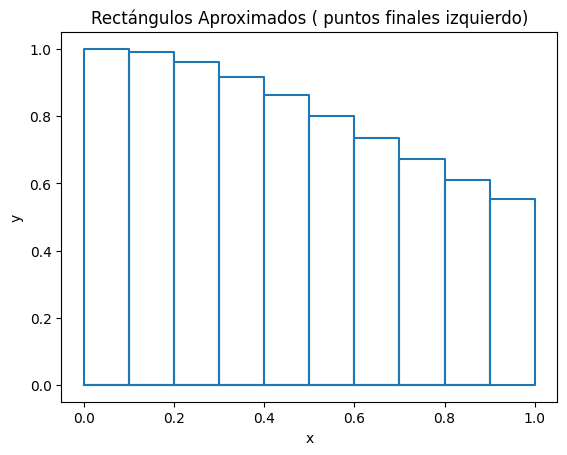

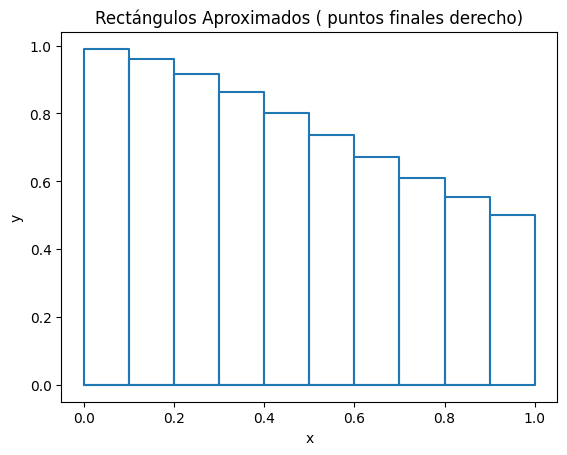

Rectángulos para n = 30:


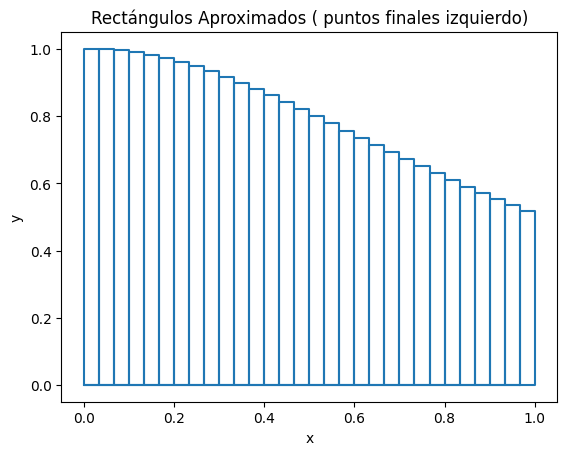

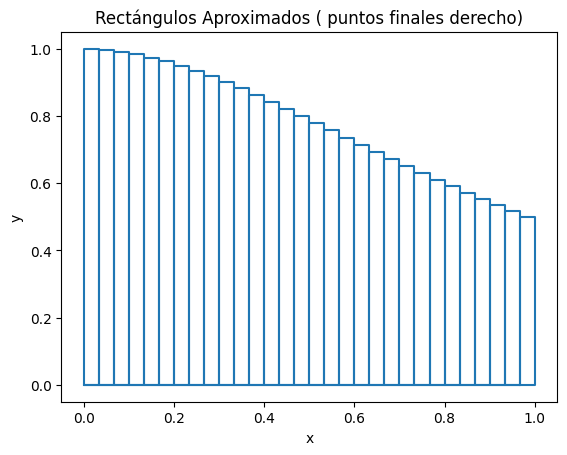

Rectángulos para n = 50:


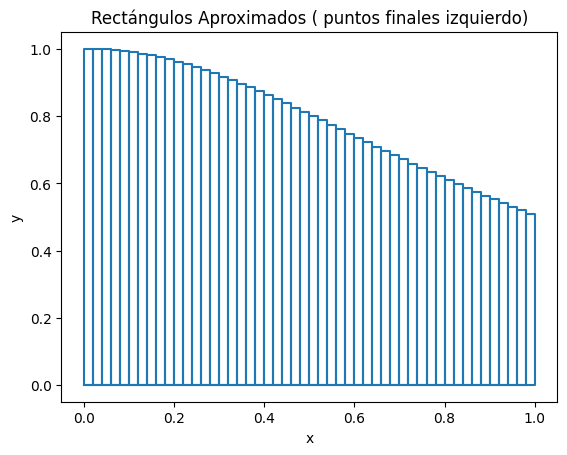

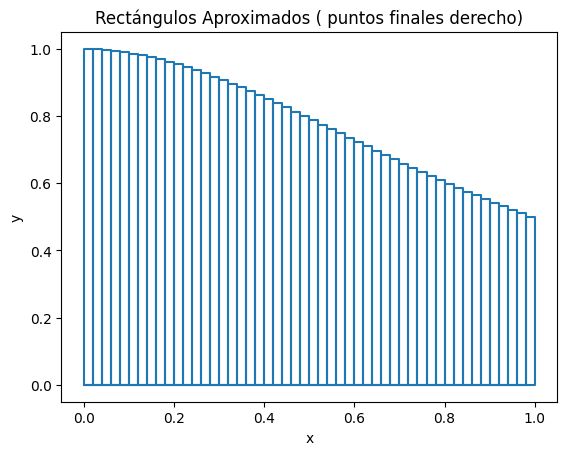

El área exacta está entre 0.7903814967308134 y 0.7803814967308134.


In [ ]:
import matplotlib.pyplot as plt

def f(x):
    return 1 / (1 + x**2)

def suma_extremo_izquierdo(f, a, b, n):
    ancho = (b - a) / n
    area_total = 0
    for i in range(n):
        xi = a + i * ancho
        area_total += f(xi) * ancho
    return area_total

def suma_extremo_derecho(f, a, b, n):
    ancho = (b - a) / n
    area_total = 0
    for i in range(1, n+1):
        xi = a + i * ancho
        area_total += f(xi) * ancho
    return area_total

def graficar_rectangulos(f, a, b, n, extremo='derecho'):
    ancho = (b - a) / n
    valores_x = []
    valores_y = []

    for i in range(n):
        if extremo == 'derecho':
            xi = a + (i + 1) * ancho
        elif extremo == 'izquierdo':
            xi = a + i * ancho
        yi = f(xi)
        valores_x.extend([a + i * ancho, a + (i + 1) * ancho, a + (i + 1) * ancho, a + i * ancho, a + i * ancho])
        valores_y.extend([0, 0, yi, yi, 0])

    plt.plot(valores_x, valores_y)
    plt.title(f"Rectángulos Aproximados ( puntos finales {extremo})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

# Límites de integración
inicio = 0
fin = 1

# Número de rectángulos
valores_de_n = [10, 30, 50]

# (a) Encontrar sumas de extremo izquierdo y derecho para n = 10, 30 y 50
print("Sumas de Extremo Izquierdo y Derecho:")
for n in valores_de_n:
    suma_izquierda = suma_extremo_izquierdo(f, inicio, fin, n)
    suma_derecha = suma_extremo_derecho(f, inicio, fin, n)
    print(f"n = {n}: Suma Izquierda = {suma_izquierda}, Suma Derecha = {suma_derecha}")

# (b) Ilustrar graficando los rectángulos
for n in valores_de_n:
    print(f"Rectángulos para n = {n}:")
    graficar_rectangulos(f, inicio, fin, n, extremo='izquierdo')
    graficar_rectangulos(f, inicio, fin, n, extremo='derecho')

# (c) El área exacta está entre 0.780 y 0.791
area_exacta_inferior = suma_extremo_izquierdo(f, inicio, fin, max(valores_de_n))
area_exacta_superior = suma_extremo_derecho(f, inicio, fin, max(valores_de_n))
print(f"El área exacta está entre {area_exacta_inferior} y {area_exacta_superior}.")




Área total encerrada por las curvas: 20.393876913398138


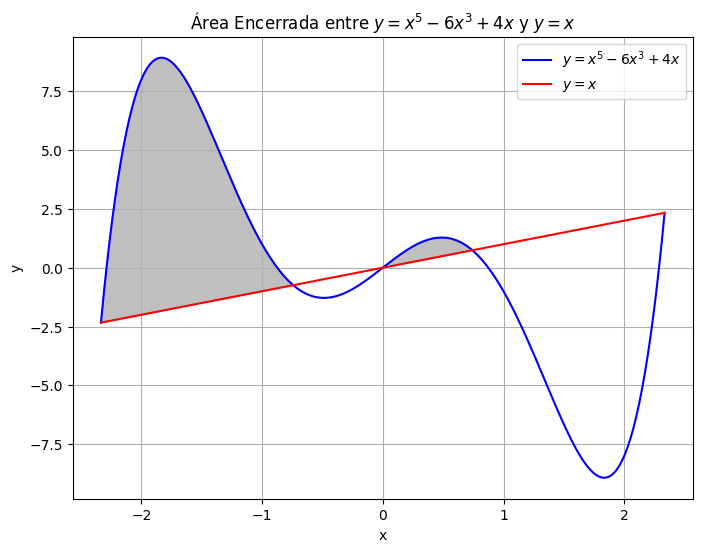

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Definir la variable simbólica
x = sp.symbols('x')

# Definir las funciones
f1 = x**5 - 6*x**3 + 4*x
f2 = x

# Encontrar los puntos de intersección
puntos_interseccion = sp.solve(f1 - f2, x)

# Ordenar los puntos de intersección
puntos_interseccion = sorted(puntos_interseccion, key=lambda punto: punto.evalf())

# Calcular el área total encerrada entre las curvas
area_total_encerrada = 0
for i in range(len(puntos_interseccion) - 1):
    # Calcular la integral absoluta entre dos puntos consecutivos
    def integrando(x_val):
        return abs(f1.subs(x, x_val) - f2.subs(x, x_val))
    area_encerrada, _ = quad(integrando, float(puntos_interseccion[i]), float(puntos_interseccion[i+1]))
    area_total_encerrada += area_encerrada

print("Área total encerrada por las curvas:", area_total_encerrada)

# Convertir las expresiones simbólicas en funciones numpy para trazarlas
f1_np = sp.lambdify(x, f1, 'numpy')
f2_np = sp.lambdify(x, f2, 'numpy')

# Crear un rango de valores de x para trazar las funciones
x_values = np.linspace(float(puntos_interseccion[0]), float(puntos_interseccion[-1]), 400)

# Calcular los valores correspondientes de y para ambas funciones
y_values_f1 = f1_np(x_values)
y_values_f2 = f2_np(x_values)

# Graficar las funciones y el área encerrada
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values_f1, label='$y = x^5 - 6x^3 + 4x$', color='blue')
plt.plot(x_values, y_values_f2, label='$y = x$', color='red')
plt.fill_between(x_values, y_values_f1, y_values_f2, where=(y_values_f1 >= y_values_f2), color='gray', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Área Encerrada entre $y = x^5 - 6x^3 + 4x$ y $y = x$')
plt.legend()
plt.grid(True)
plt.show()
